In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_before = pd.read_csv('your_data.csv')
df_before

,Unnamed: 0,fasting blood sugar,triglyceride,ALT,waist(cm),serum creatinine,systolic,weight(kg),AST,dental caries,Cholesterol,smoking
0,0,94,300,25,81.0,1.0,135,60,22,0,172,1
1,1,147,55,23,89.0,1.1,146,65,27,1,194,0
2,2,79,197,31,81.0,0.8,118,75,27,0,178,1
3,3,91,203,27,105.0,1.0,131,95,20,1,180,0
4,4,91,87,13,80.5,0.8,121,60,19,0,155,1
...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,64,47,26,69.0,0.8,127,45,25,0,238,0
159252,159252,89,202,20,82.0,0.6,120,75,21,0,213,0
159253,159253,84,45,9,66.0,0.6,114,50,15,0,189,0
159254,159254,122,148,17,92.0,1.1,121,75,22,0,165,1


In [3]:
df_after = pd.read_csv('modified_data.csv')
df_after

,Unnamed: 0,fasting blood sugar,triglyceride,serum creatinine,systolic,dental caries,Cholesterol,AST_ALT_ratio,waist_weight_ratio,smoking
0,0,94.0,297.0,1.0,135.0,0,172.0,0.880000,1.350000,1.0
1,1,122.5,55.0,1.1,146.0,1,194.0,1.173913,1.369231,0.0
2,2,79.0,197.0,0.8,118.0,0,178.0,0.870967,1.080000,1.0
3,3,91.0,203.0,1.0,131.0,1,180.0,0.740740,1.105263,0.0
4,4,91.0,87.0,0.8,121.0,0,155.0,1.461537,1.341667,1.0
...,...,...,...,...,...,...,...,...,...,...
139301,159249,91.0,248.0,0.9,110.0,0,220.0,0.590909,1.075294,1.0
139302,159251,70.5,47.0,0.8,127.0,0,238.0,0.961538,1.533333,0.0
139303,159253,84.0,45.0,0.6,114.0,0,189.0,1.666665,1.320000,0.0
139304,159254,122.0,148.0,1.1,121.0,0,165.0,1.294117,1.226667,1.0


In [4]:
df_before.drop(columns=['Unnamed: 0'], inplace=True)
df_after.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
features_before = df_before.select_dtypes(include=[np.number]).columns.tolist()
features_after = df_after.select_dtypes(include=[np.number]).columns.tolist()

## There were a lot of outliers make it hard to understand the data's statistics so: 

- Upper outliers were set to the upper fence (75th percentile + 1.5 × IQR).
- Lower outliers were set to the lower fence (25th percentile − 1.5 × IQR).

### The data target was imbalanced so I downsample the higher one

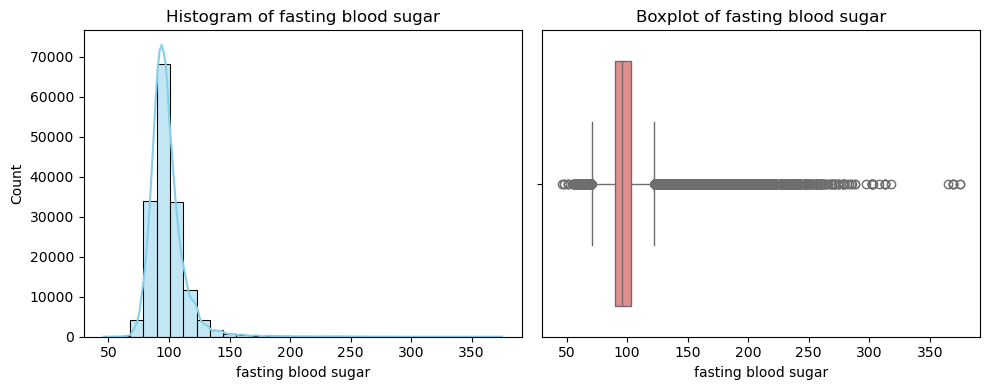

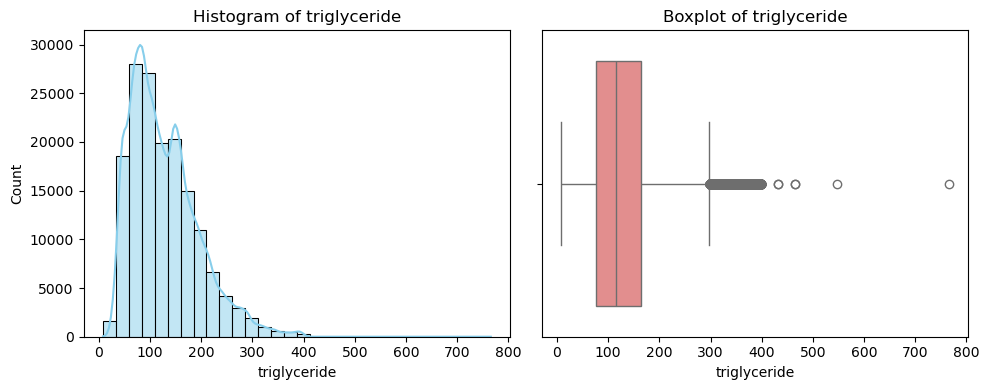

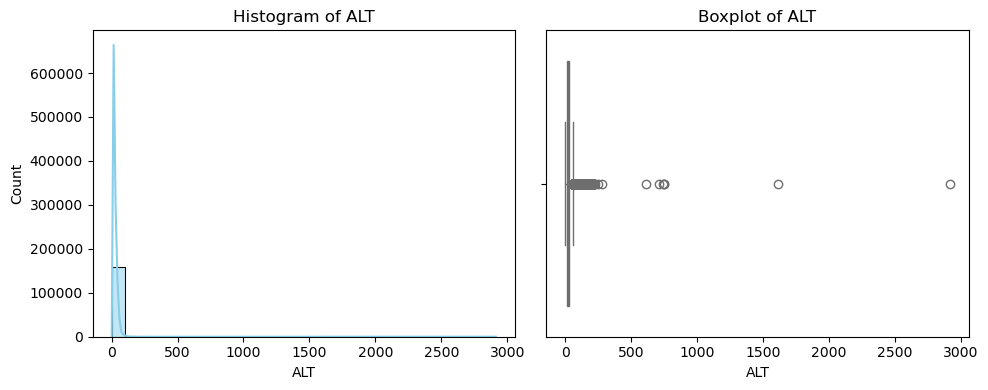

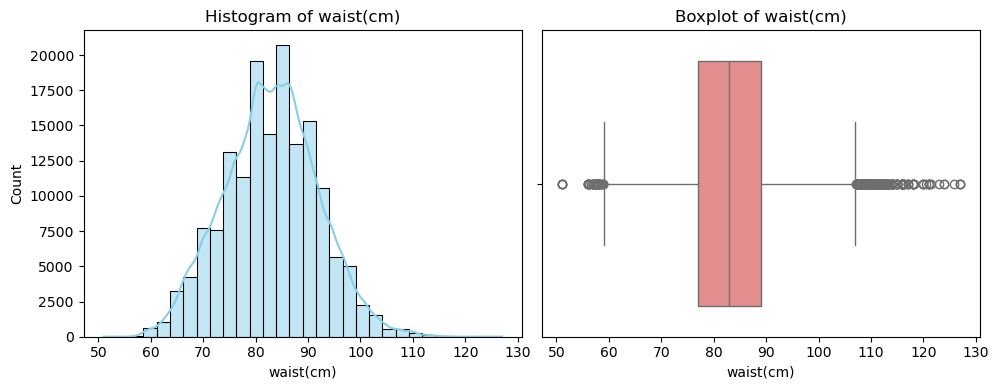

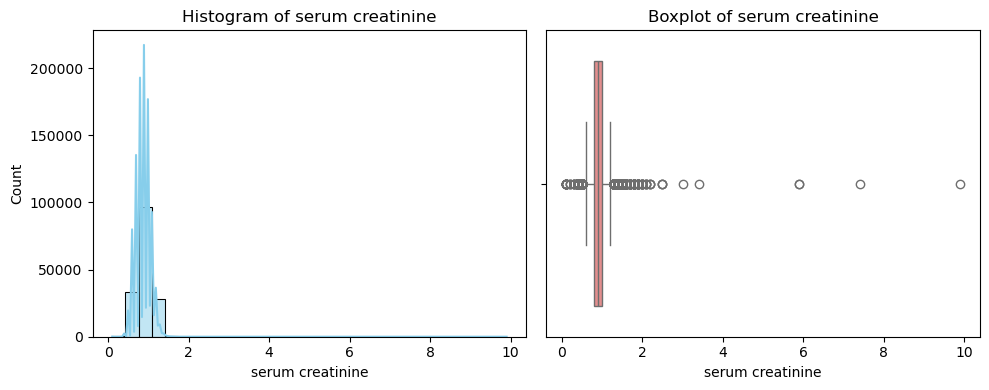

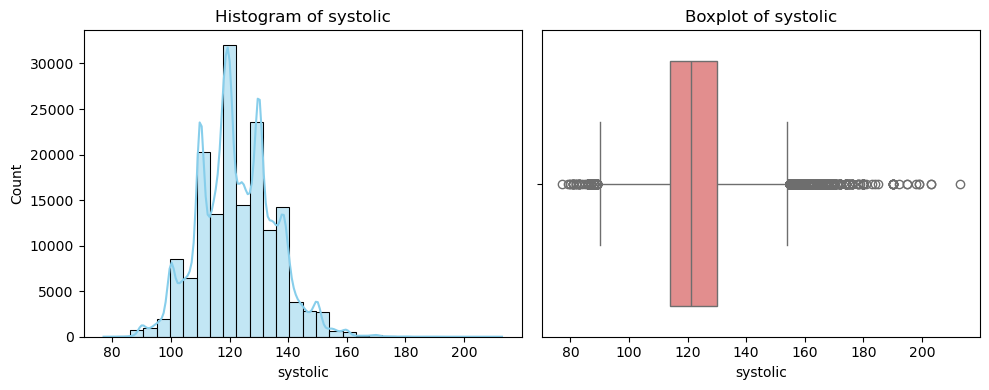

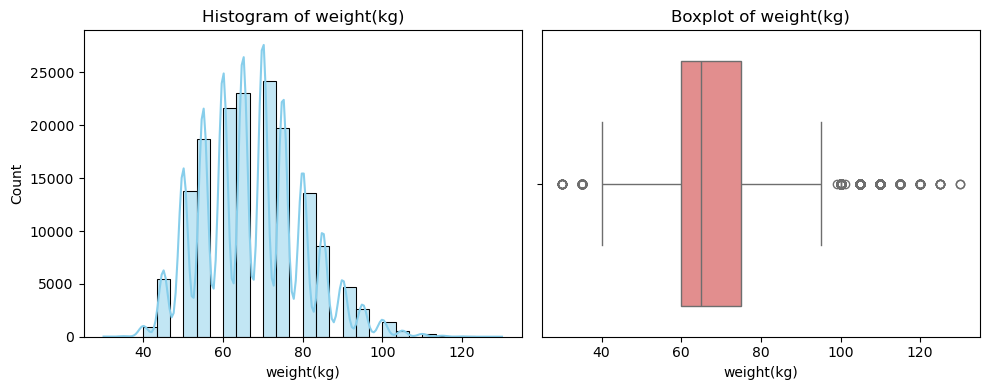

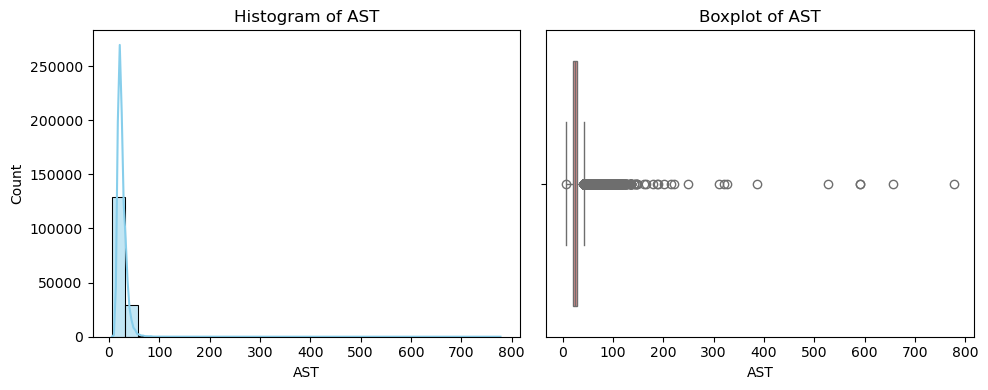

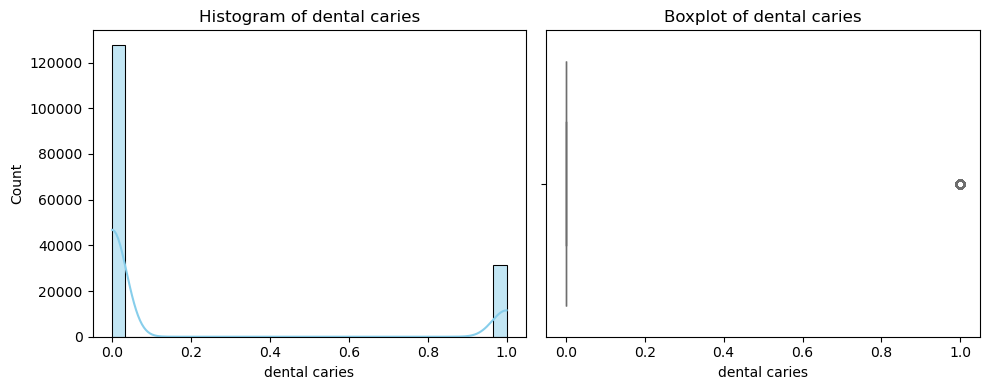

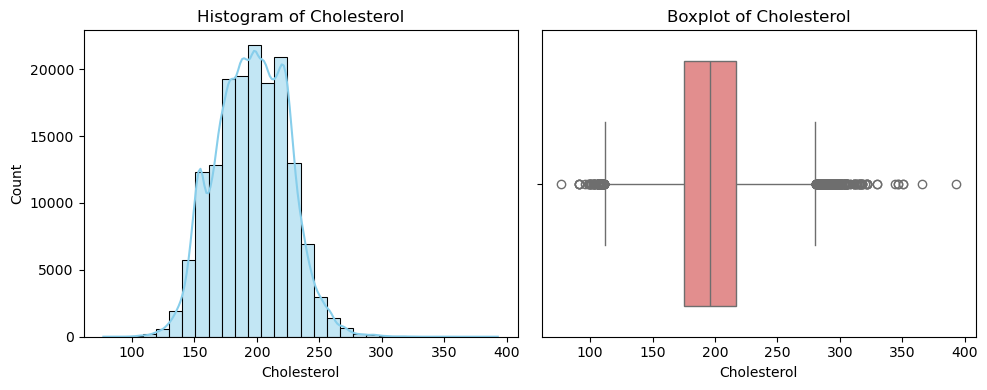

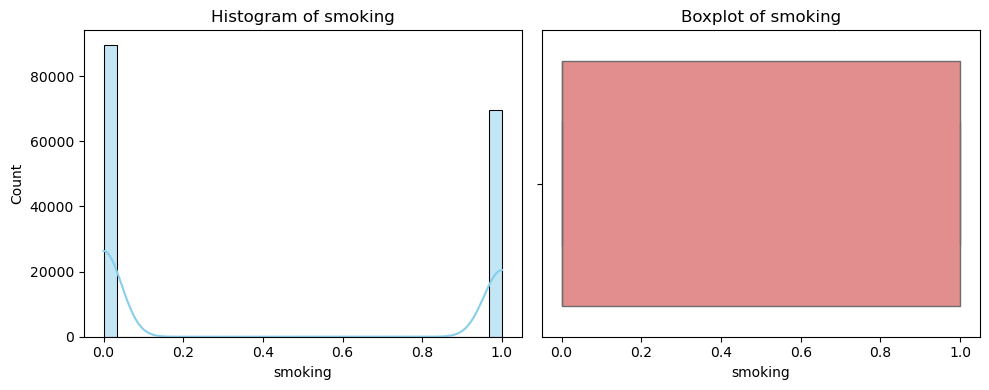

In [26]:
for col in features_before:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_before[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_before[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


## so now data is easy to be understand, to determine the median and which is right skewed and which is left

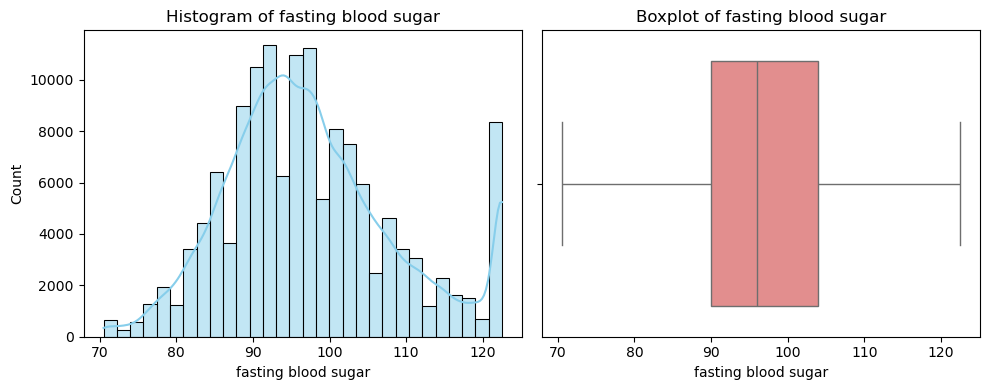

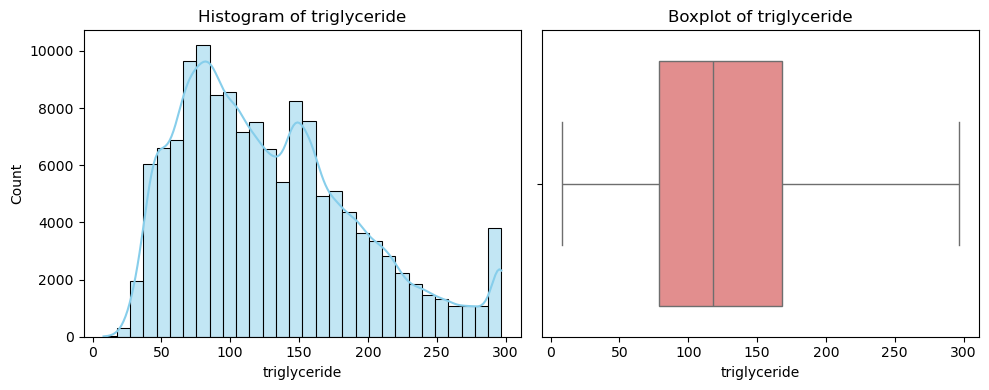

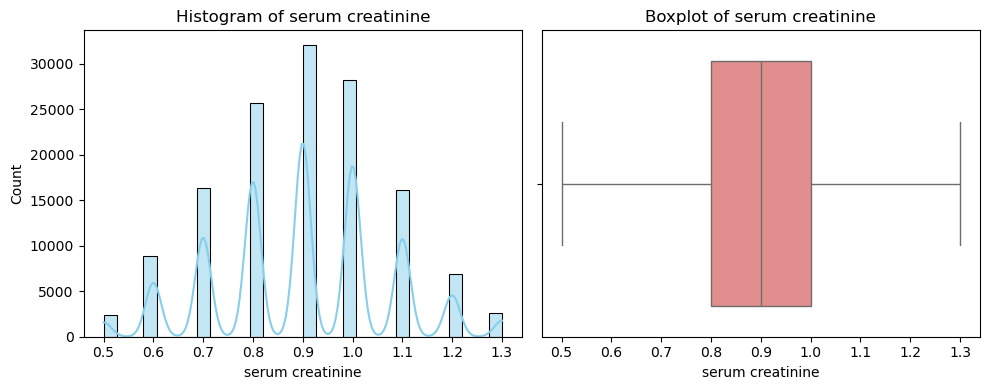

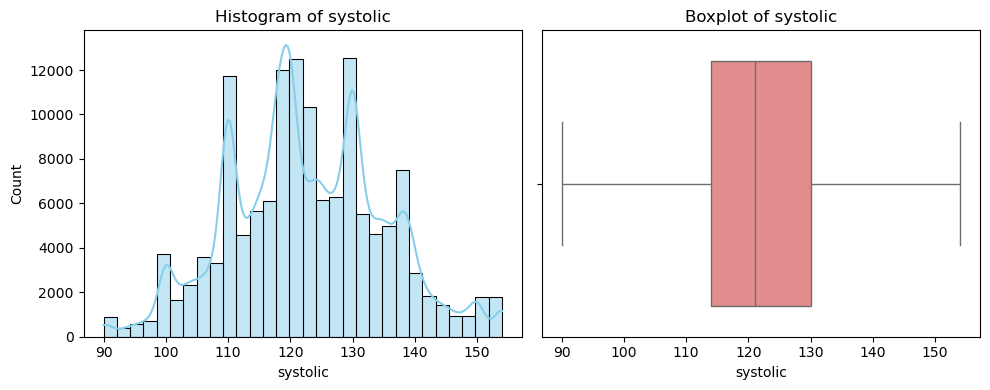

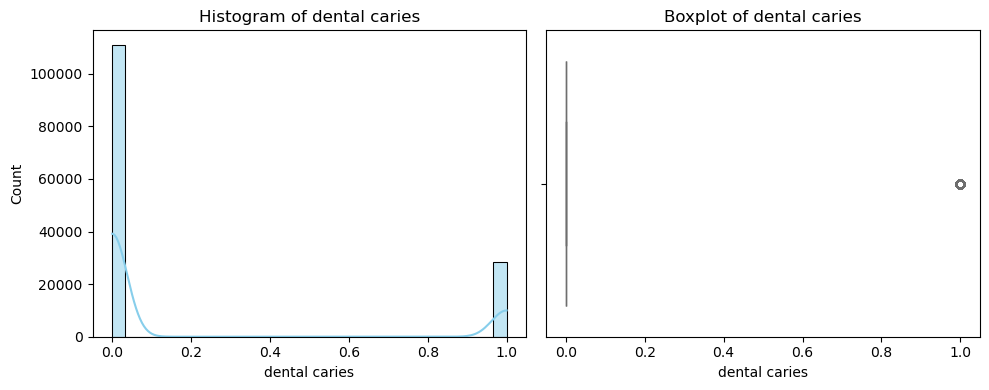

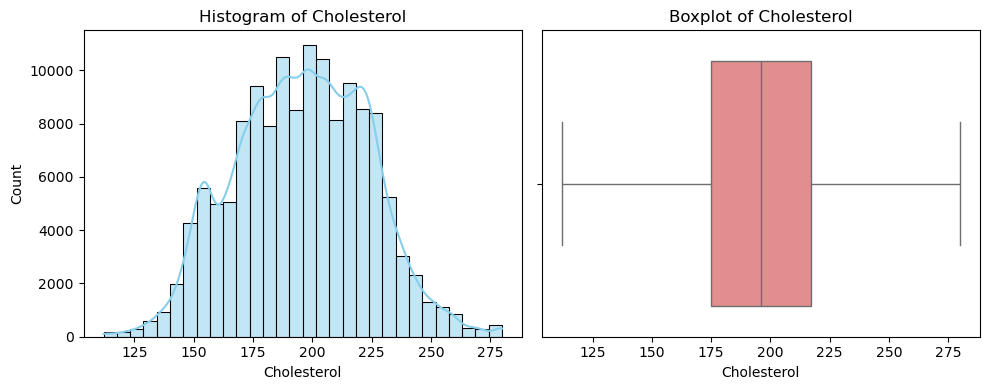

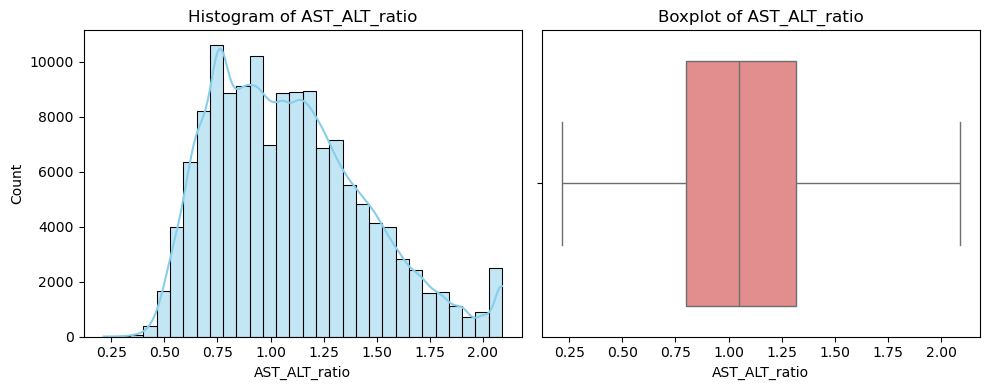

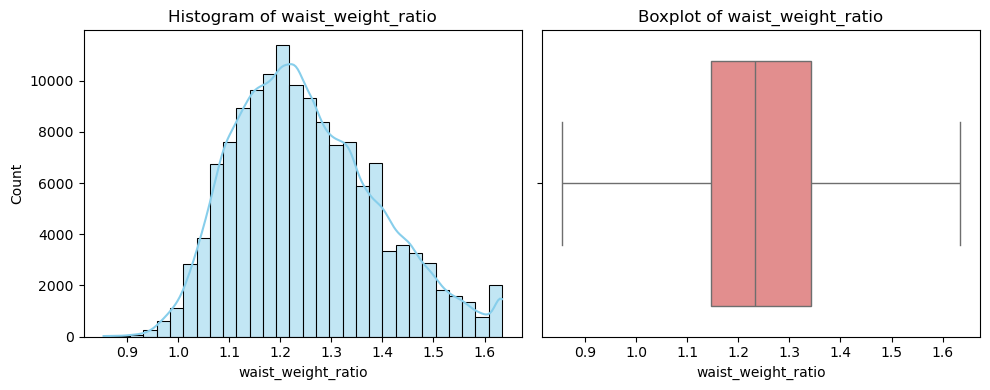

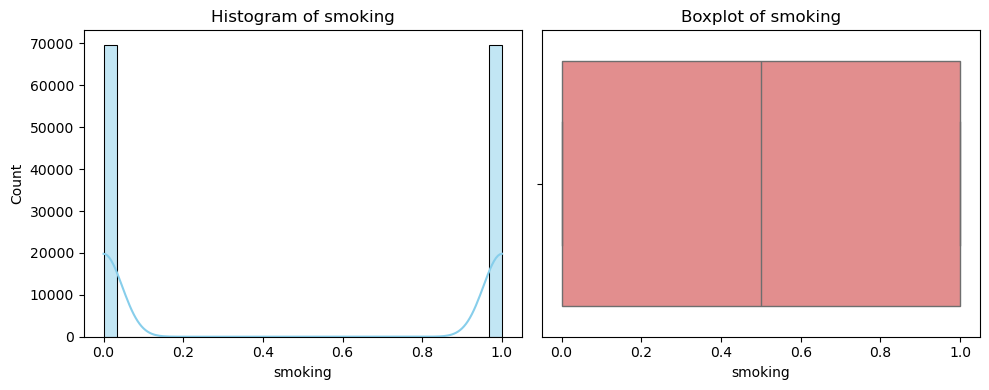

In [27]:
for col in features_after:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_after[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_after[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


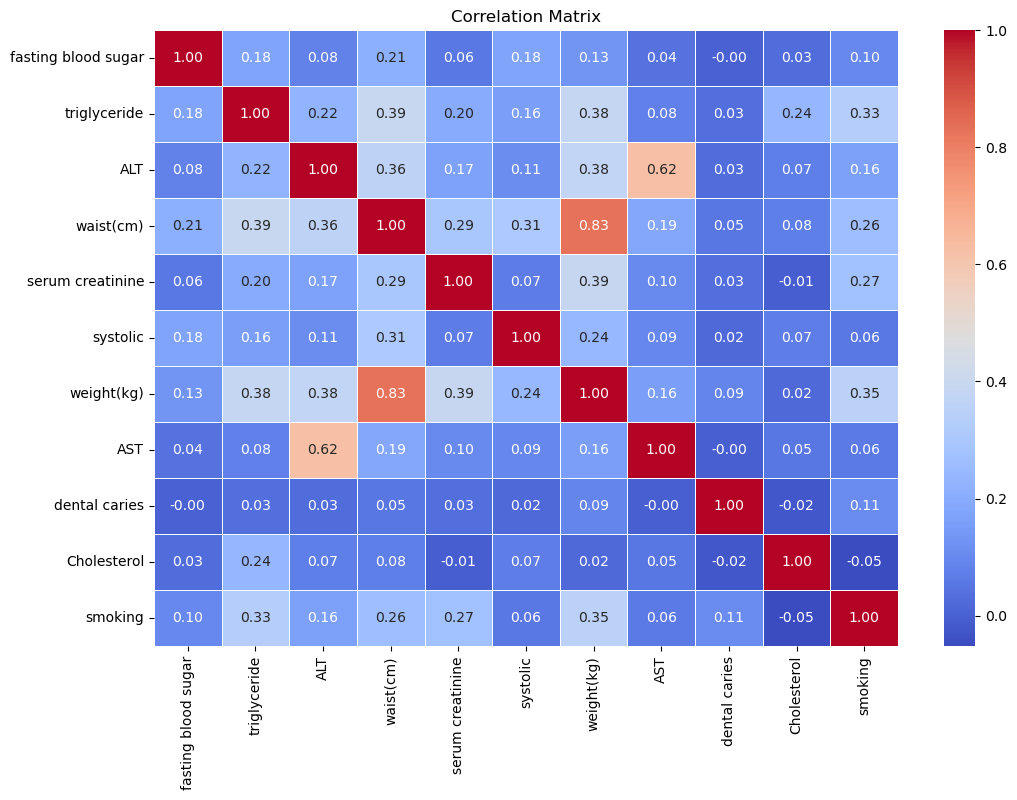

In [24]:
plt.figure(figsize=(12, 8))
corr = df_before[features_before].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## AS in Bivariate Analysis
- I Found that cholestrol, systolic and dental caries were poorly correlated with the target so i applied t-test on cholestrol and systolic, and chi_squared test on dental caries but the results were good and there were no need to remove them

## AS in Multivariate Analysis
- Ast and Alt were high correlated and i found that the ratio between them were verified medically so i created a new feature AST/ALT and removed them
- Weight and Waist were high correlated so i also created a new feature waist/weight and removed them 

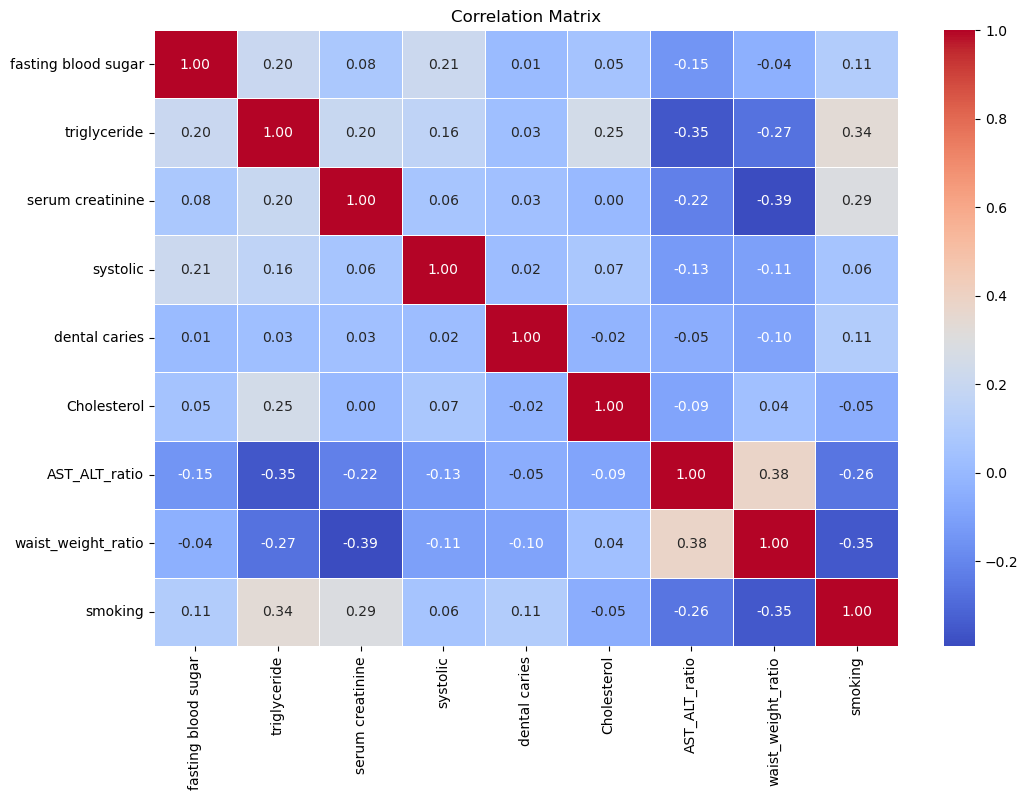

In [32]:
plt.figure(figsize=(12, 8))
corr = df_after[features_after].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()